<a href="https://colab.research.google.com/github/Ash100/PD/blob/main/First_Test_D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#@title **Protein Binder Design Analysis** { run: "auto" }
#@markdown ### Load libraries and data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
import os

# Set global styles (UPDATED STYLE OPTIONS)
plt.style.use('seaborn-v0_8-whitegrid')  # Modern seaborn style
rcParams['figure.dpi'] = 300
rcParams['savefig.dpi'] = 600
rcParams['font.size'] = 10
rcParams['font.family'] = 'DejaVu Sans'  # Ensures text rendering compatibility

# Print available styles for reference
print("Available matplotlib styles:")
print(plt.style.available)

# Load data
try:
    df = pd.read_csv("/content/final_design_stats.csv")
    print(f"\nLoaded {len(df)} designs. First 5 rows:")
    display(df.head())
except FileNotFoundError:
    raise FileNotFoundError("File 'final_design_stats.csv' not found. Please upload it to Colab first!")

# Create output directory
os.makedirs("plots", exist_ok=True)
print("\nOutput directory 'plots/' created for figures.")

Available matplotlib styles:
['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']

Loaded 72 designs. First 5 rows:


,Rank,Design,Protocol,Length,Seed,Helicity,Target_Hotspot,Sequence,InterfaceResidues,MPNN_score,...,1_Binder_RMSD,2_Binder_RMSD,3_Binder_RMSD,4_Binder_RMSD,5_Binder_RMSD,DesignTime,Notes,TargetSettings,Filters,AdvancedSettings
0,1,PhoQ_l43_s535428_mpnn3,3stage,43,535428,0.95,A127-147,SEKEKLIEEMVKLNQEMQKNWLNLEKAAEYADKIEELHKKLLE,"B7,B10,B11,B14,B15,B17,B18,B21,B22,B24,B25,B27...",0.96,...,1.14,1.11,NaN,NaN,NaN,"0 hours, 1 minutes, 35 seconds",NaN,PhoQ,default_filters,peptide_3stage_multimer_mpnn_flexible
1,2,PhoQ_l49_s225011_mpnn21,3stage,49,225011,0.95,A127-147,DKEVLLGHVQHHLDYNKKLLEAFKDKDPKVVETLEKNIKLAEELIKELS,"B1,B3,B4,B5,B7,B8,B9,B11,B12,B14,B15,B16,B18,B...",0.94,...,1.16,1.09,NaN,NaN,NaN,"0 hours, 1 minutes, 52 seconds",NaN,PhoQ,default_filters,peptide_3stage_multimer_mpnn_flexible
2,3,PhoQ_l43_s535428_mpnn4,3stage,43,535428,0.95,A127-147,SEREKLIEEMVKLSQEMWKNWLNLEKAEEYANKIEELHKKLLE,"B7,B8,B10,B11,B12,B14,B15,B17,B18,B19,B21,B22,...",0.96,...,1.06,0.99,NaN,NaN,NaN,"0 hours, 1 minutes, 36 seconds",NaN,PhoQ,default_filters,peptide_3stage_multimer_mpnn_flexible
3,4,PhoQ_l36_s105997_mpnn2,3stage,36,105997,0.95,A127-147,MSDEEFIKELEERREKRLKQIEEILSKENPELLKEI,"B1,B3,B4,B6,B7,B9,B10,B11,B13,B14,B15,B17,B18,...",1.05,...,1.35,1.38,NaN,NaN,NaN,"0 hours, 1 minutes, 41 seconds","Absorption value is 0.0, consider adding trypt...",PhoQ,default_filters,peptide_3stage_multimer_mpnn_flexible
4,5,PhoQ_l42_s728404_mpnn8,3stage,42,728404,0.95,A127-147,DEEKKKLLKEILEEYEELKDVASPFHKPYAKAIAEWAKEQLK,"B3,B4,B7,B8,B10,B11,B14,B15,B17,B18,B21,B22,B2...",1.14,...,1.66,1.54,NaN,NaN,NaN,"0 hours, 1 minutes, 39 seconds",NaN,PhoQ,default_filters,peptide_3stage_multimer_mpnn_flexible



Output directory 'plots/' created for figures.


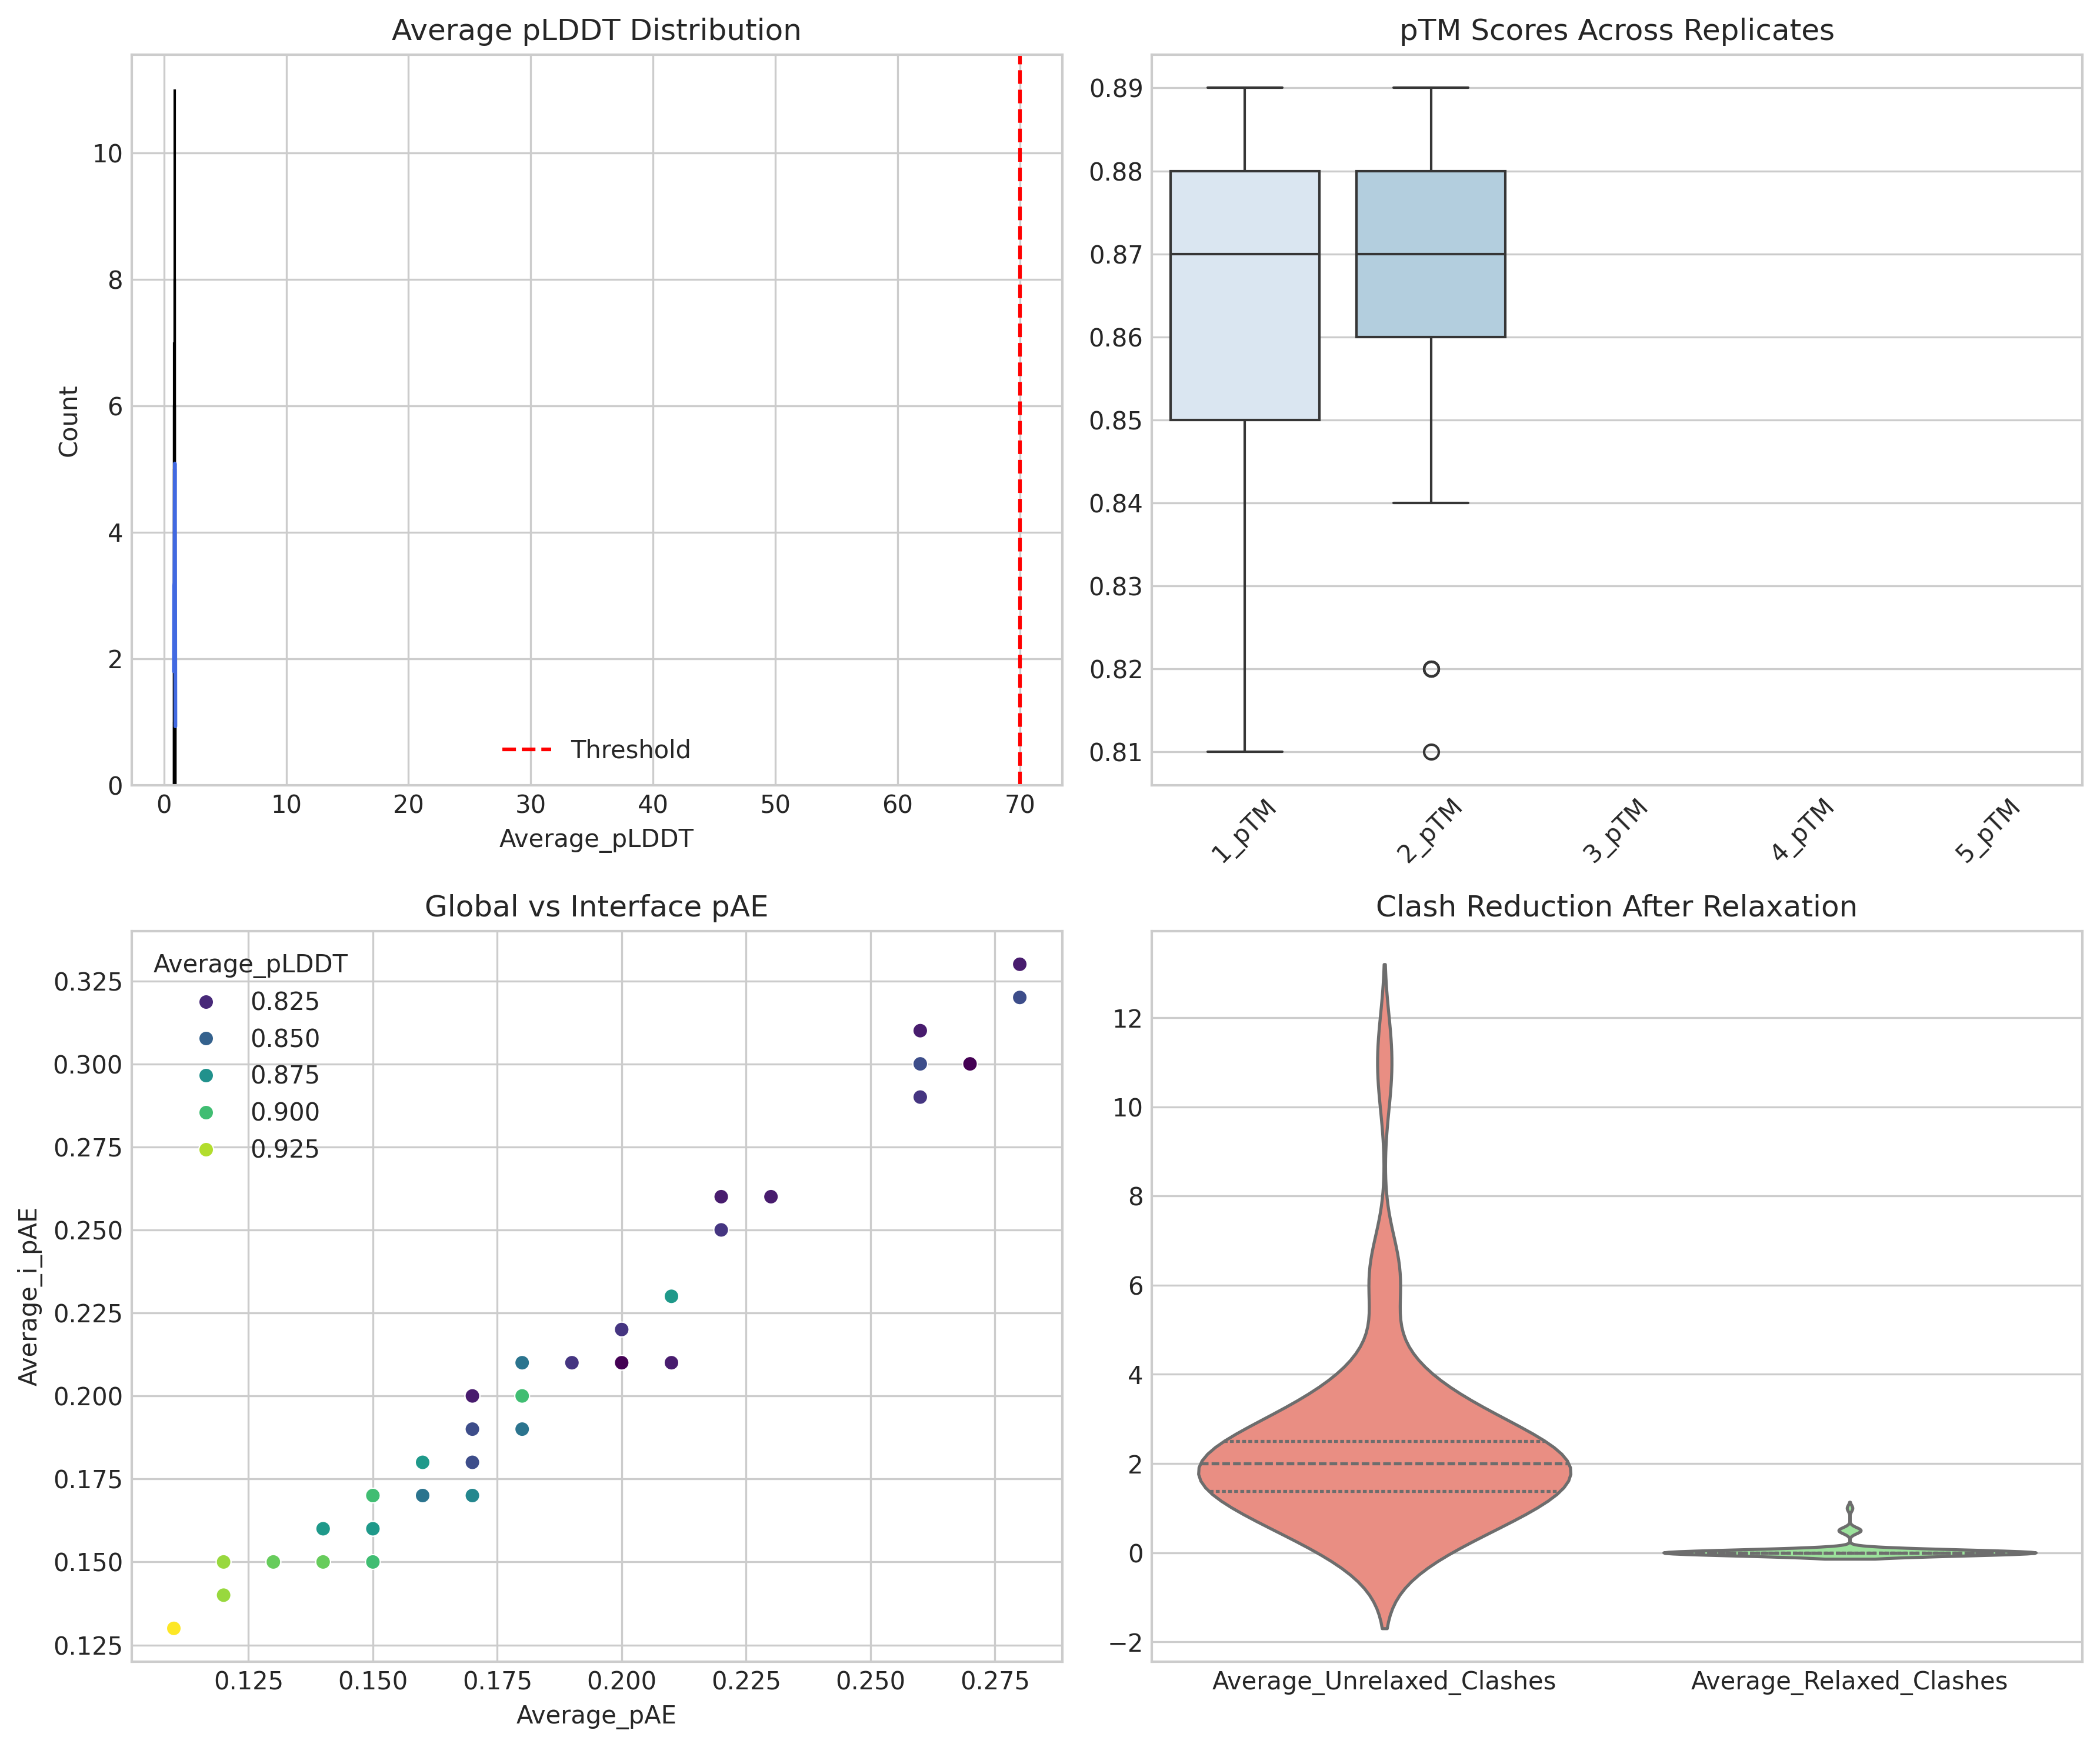

In [4]:
#@title **1. Quality Metrics Distribution** { vertical-output: true }
#@markdown Confidence scores and structural quality
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# pLDDT Distribution
sns.histplot(df['Average_pLDDT'], bins=20, kde=True, ax=axes[0,0], color='royalblue')
axes[0,0].set_title('Average pLDDT Distribution')
axes[0,0].axvline(70, color='red', linestyle='--', label='Threshold')
axes[0,0].legend()

# pTM Distribution
sns.boxplot(data=df[['1_pTM', '2_pTM', '3_pTM', '4_pTM', '5_pTM']],
            ax=axes[0,1], palette='Blues')
axes[0,1].set_title('pTM Scores Across Replicates')
axes[0,1].tick_params(axis='x', rotation=45)

# pAE vs i_pAE
sns.scatterplot(data=df, x='Average_pAE', y='Average_i_pAE',
                hue='Average_pLDDT', palette='viridis', ax=axes[1,0])
axes[1,0].set_title('Global vs Interface pAE')

# Clashes before/after relaxation
sns.violinplot(data=df[['Average_Unrelaxed_Clashes', 'Average_Relaxed_Clashes']],
               inner="quartile", palette=['salmon', 'lightgreen'], ax=axes[1,1])
axes[1,1].set_title('Clash Reduction After Relaxation')

plt.tight_layout()
plt.savefig('plots/1_quality_metrics.png', bbox_inches='tight', dpi=600)
plt.show()

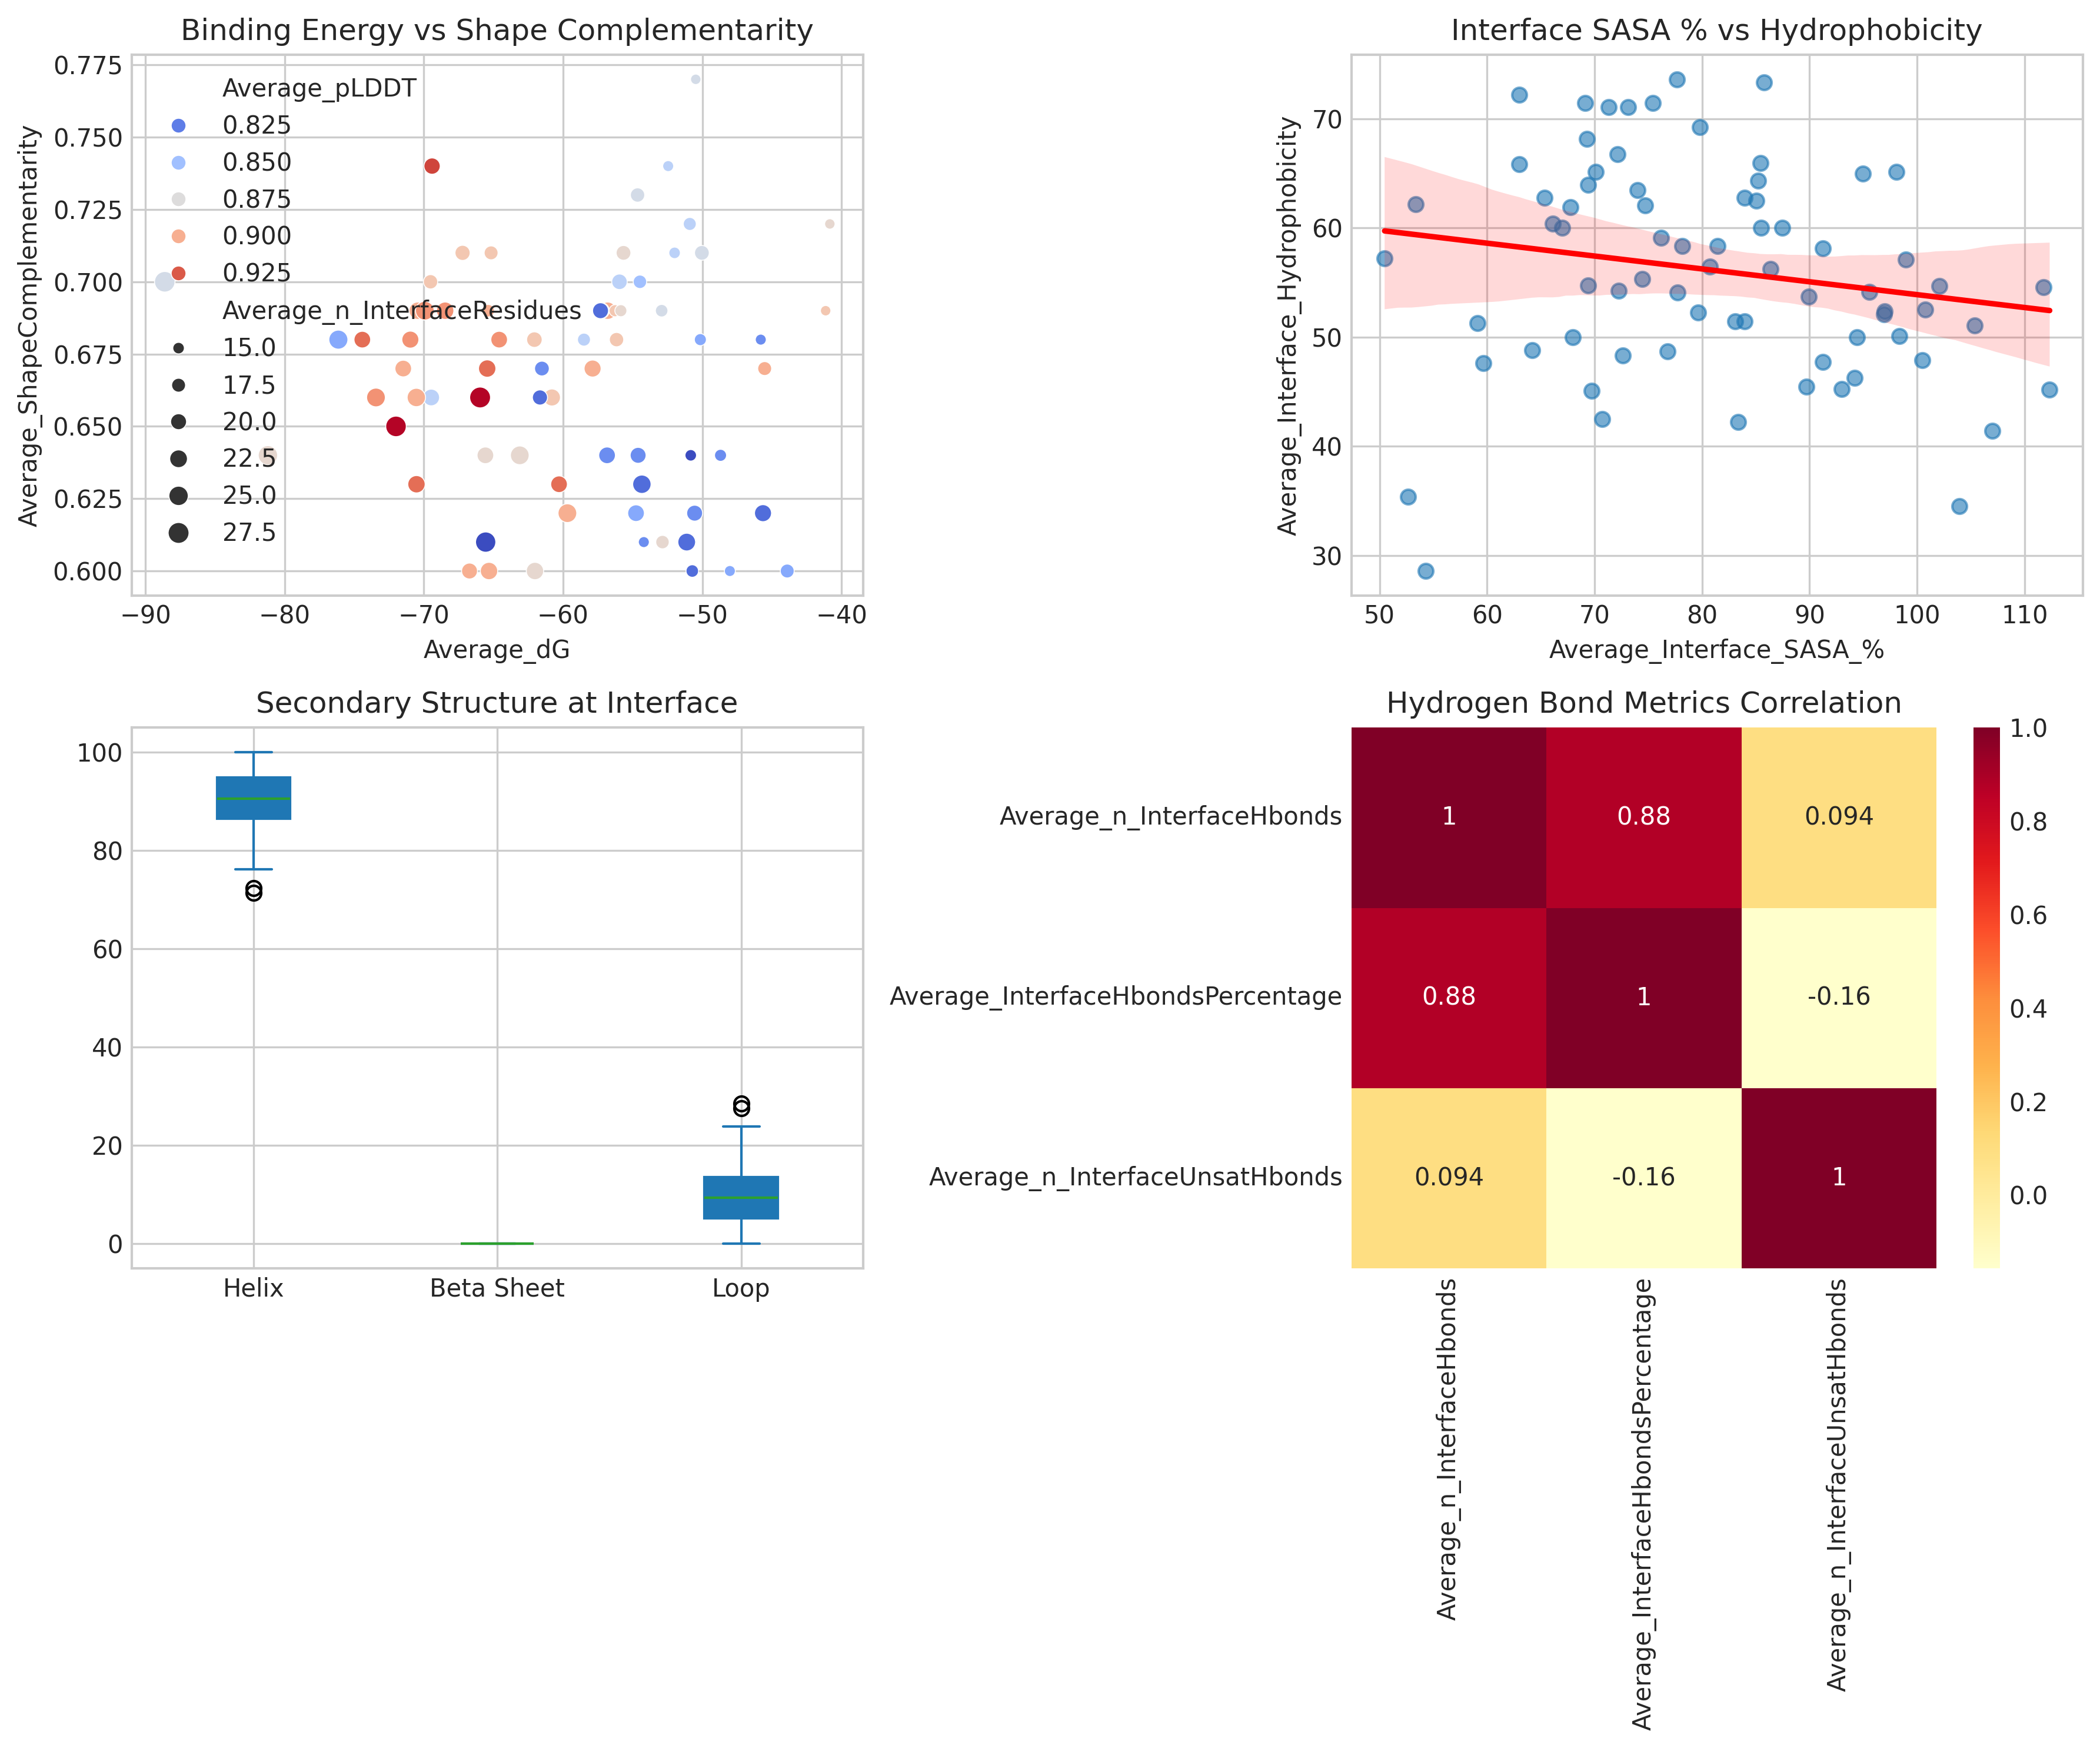

In [6]:
#@title **2. Binding Energy & Interface Properties** { vertical-output: true }
#@markdown Energetics and interface characteristics
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# dG vs Shape Complementarity
sns.scatterplot(data=df, x='Average_dG', y='Average_ShapeComplementarity',
                size='Average_n_InterfaceResidues', hue='Average_pLDDT',
                palette='coolwarm', ax=axes[0,0])
axes[0,0].set_title('Binding Energy vs Shape Complementarity')

# Interface SASA vs Hydrophobicity
sns.regplot(data=df, x='Average_Interface_SASA_%', y='Average_Interface_Hydrophobicity',
            scatter_kws={'alpha':0.6}, line_kws={'color':'red'}, ax=axes[0,1])
axes[0,1].set_title('Interface SASA % vs Hydrophobicity')

# Secondary Structure at Interface (FIXED)
ss_df = df[['Average_Interface_Helix%', 'Average_Interface_BetaSheet%', 'Average_Interface_Loop%']]
ss_df.columns = ['Helix', 'Beta Sheet', 'Loop']
box = ss_df.plot(kind='box', ax=axes[1,0], patch_artist=True)  # Enable patch coloring
# Manually set colors after creation
colors = ['#FF6B6B', '#4ECDC4', '#FFE66D']
for patch, color in zip(box.artists, colors):
    patch.set_facecolor(color)
axes[1,0].set_title('Secondary Structure at Interface')

# Hydrogen Bond Analysis
hbond_df = df[['Average_n_InterfaceHbonds', 'Average_InterfaceHbondsPercentage',
               'Average_n_InterfaceUnsatHbonds']]
sns.heatmap(hbond_df.corr(), annot=True, cmap='YlOrRd', ax=axes[1,1])
axes[1,1].set_title('Hydrogen Bond Metrics Correlation')

plt.tight_layout()
plt.savefig('plots/2_interface_properties.png', bbox_inches='tight', dpi=600)
plt.show()

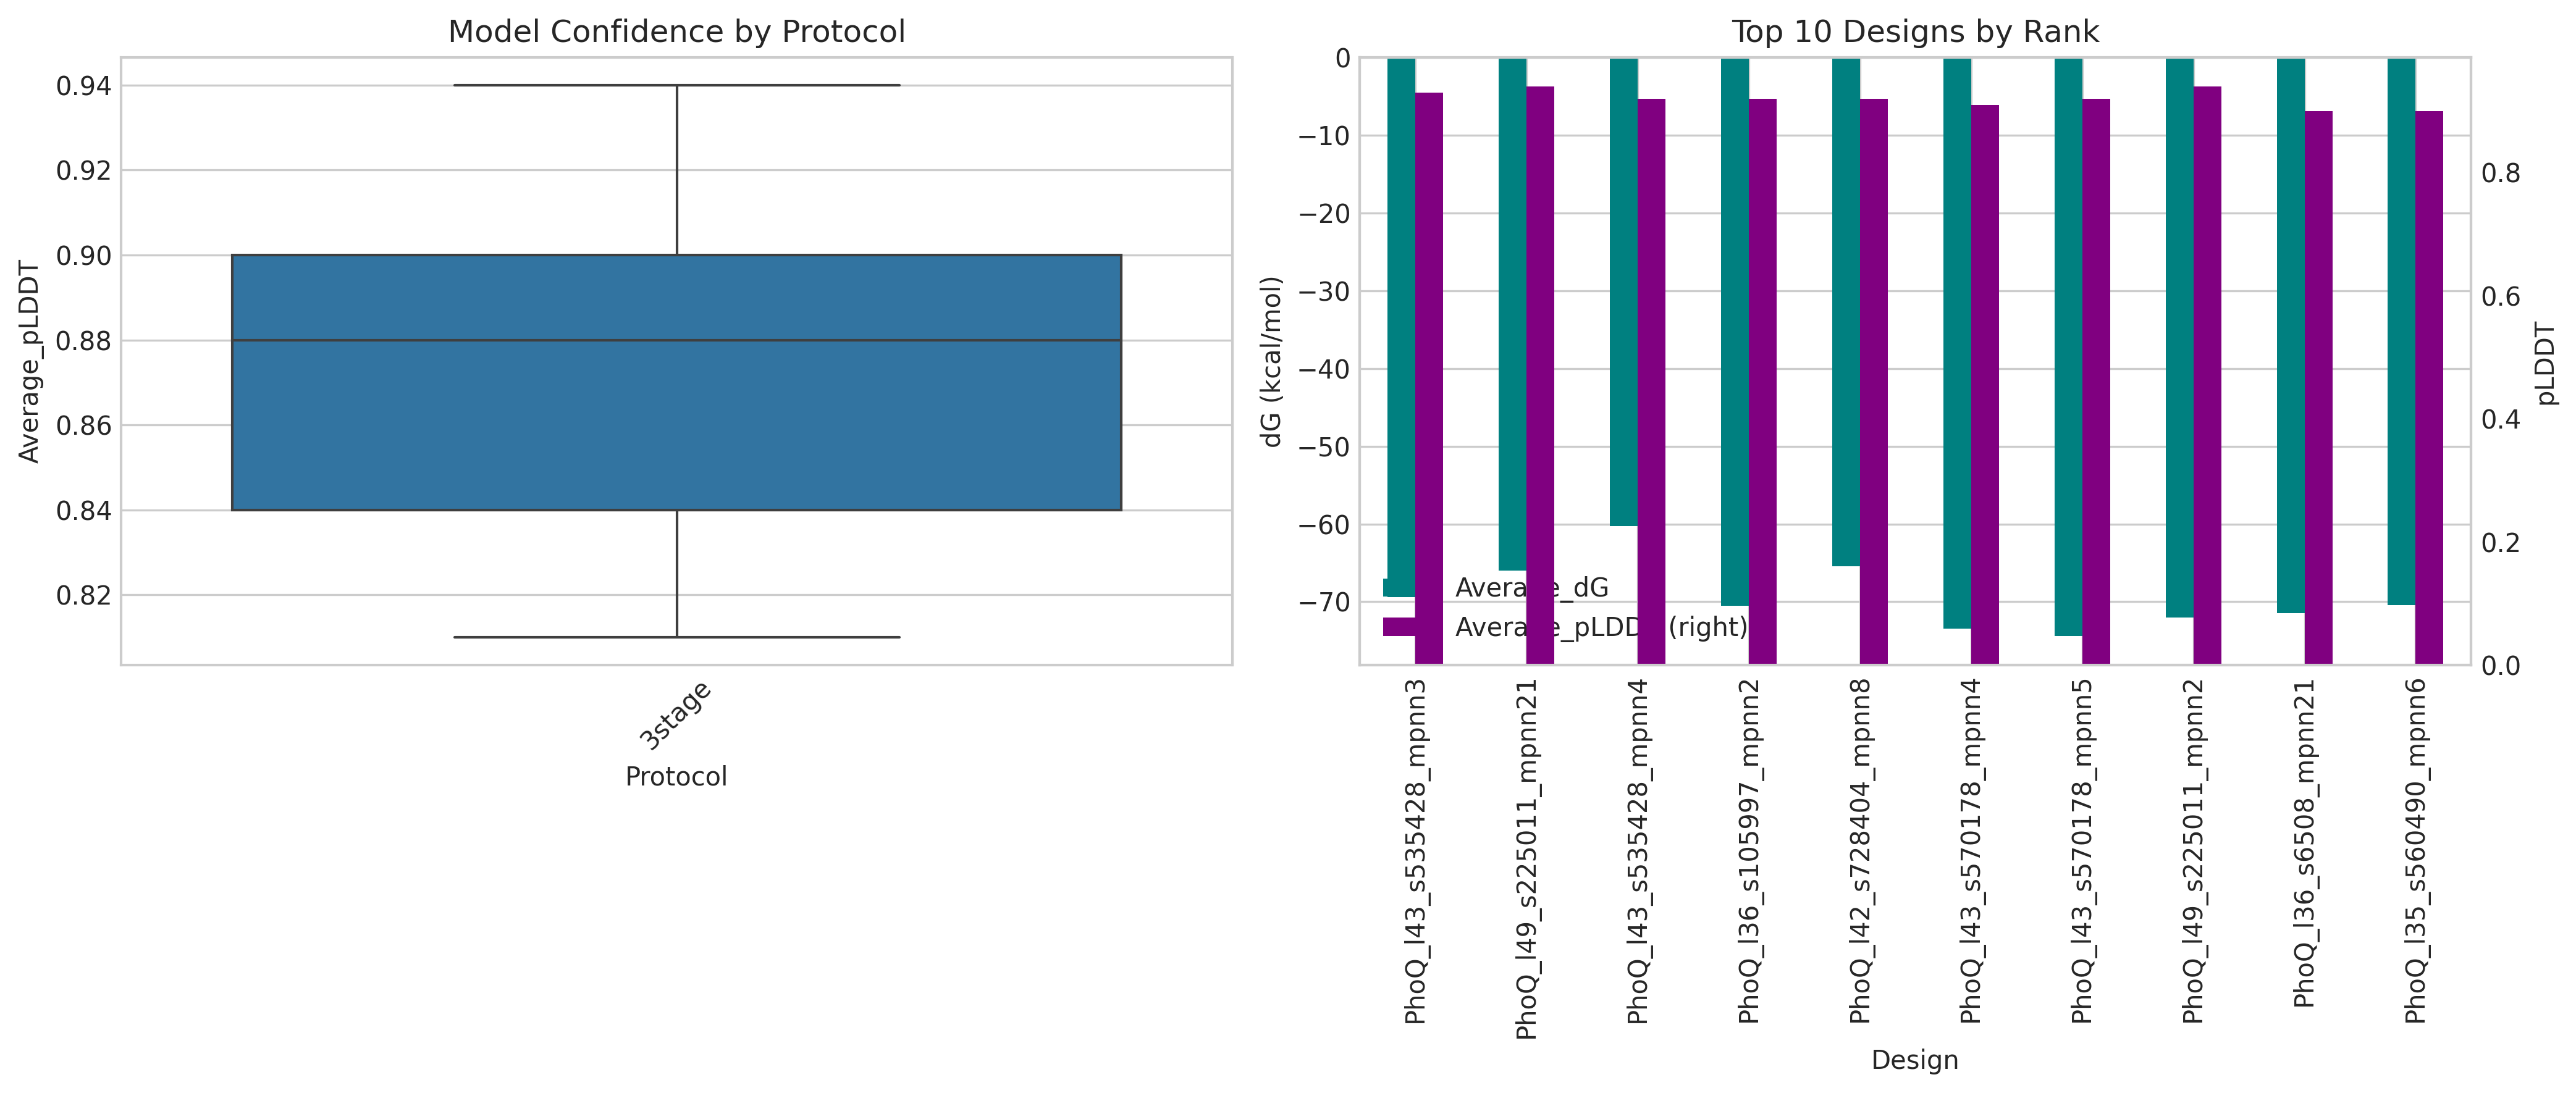

In [7]:
#@title **3. Protocol Comparison & Design Ranking** { vertical-output: true }
#@markdown Compare different protocols and top designs
fig = plt.figure(figsize=(14, 6))

# Protocol Comparison (Boxplot)
ax1 = plt.subplot2grid((1,2), (0,0))
sns.boxplot(data=df, x='Protocol', y='Average_pLDDT', hue='Protocol',
            dodge=False, ax=ax1)
ax1.set_title('Model Confidence by Protocol')
ax1.tick_params(axis='x', rotation=45)

# Top Designs (Barplot)
ax2 = plt.subplot2grid((1,2), (0,1))
top10 = df.nsmallest(10, 'Rank')[['Design', 'Average_dG', 'Average_pLDDT']]
top10.plot(x='Design', y=['Average_dG', 'Average_pLDDT'], kind='bar',
           secondary_y='Average_pLDDT', ax=ax2, color=['teal', 'purple'])
ax2.set_title('Top 10 Designs by Rank')
ax2.right_ax.set_ylabel('pLDDT')
ax2.set_ylabel('dG (kcal/mol)')

plt.tight_layout()
plt.savefig('plots/3_protocol_comparison.png', bbox_inches='tight', dpi=600)
plt.show()

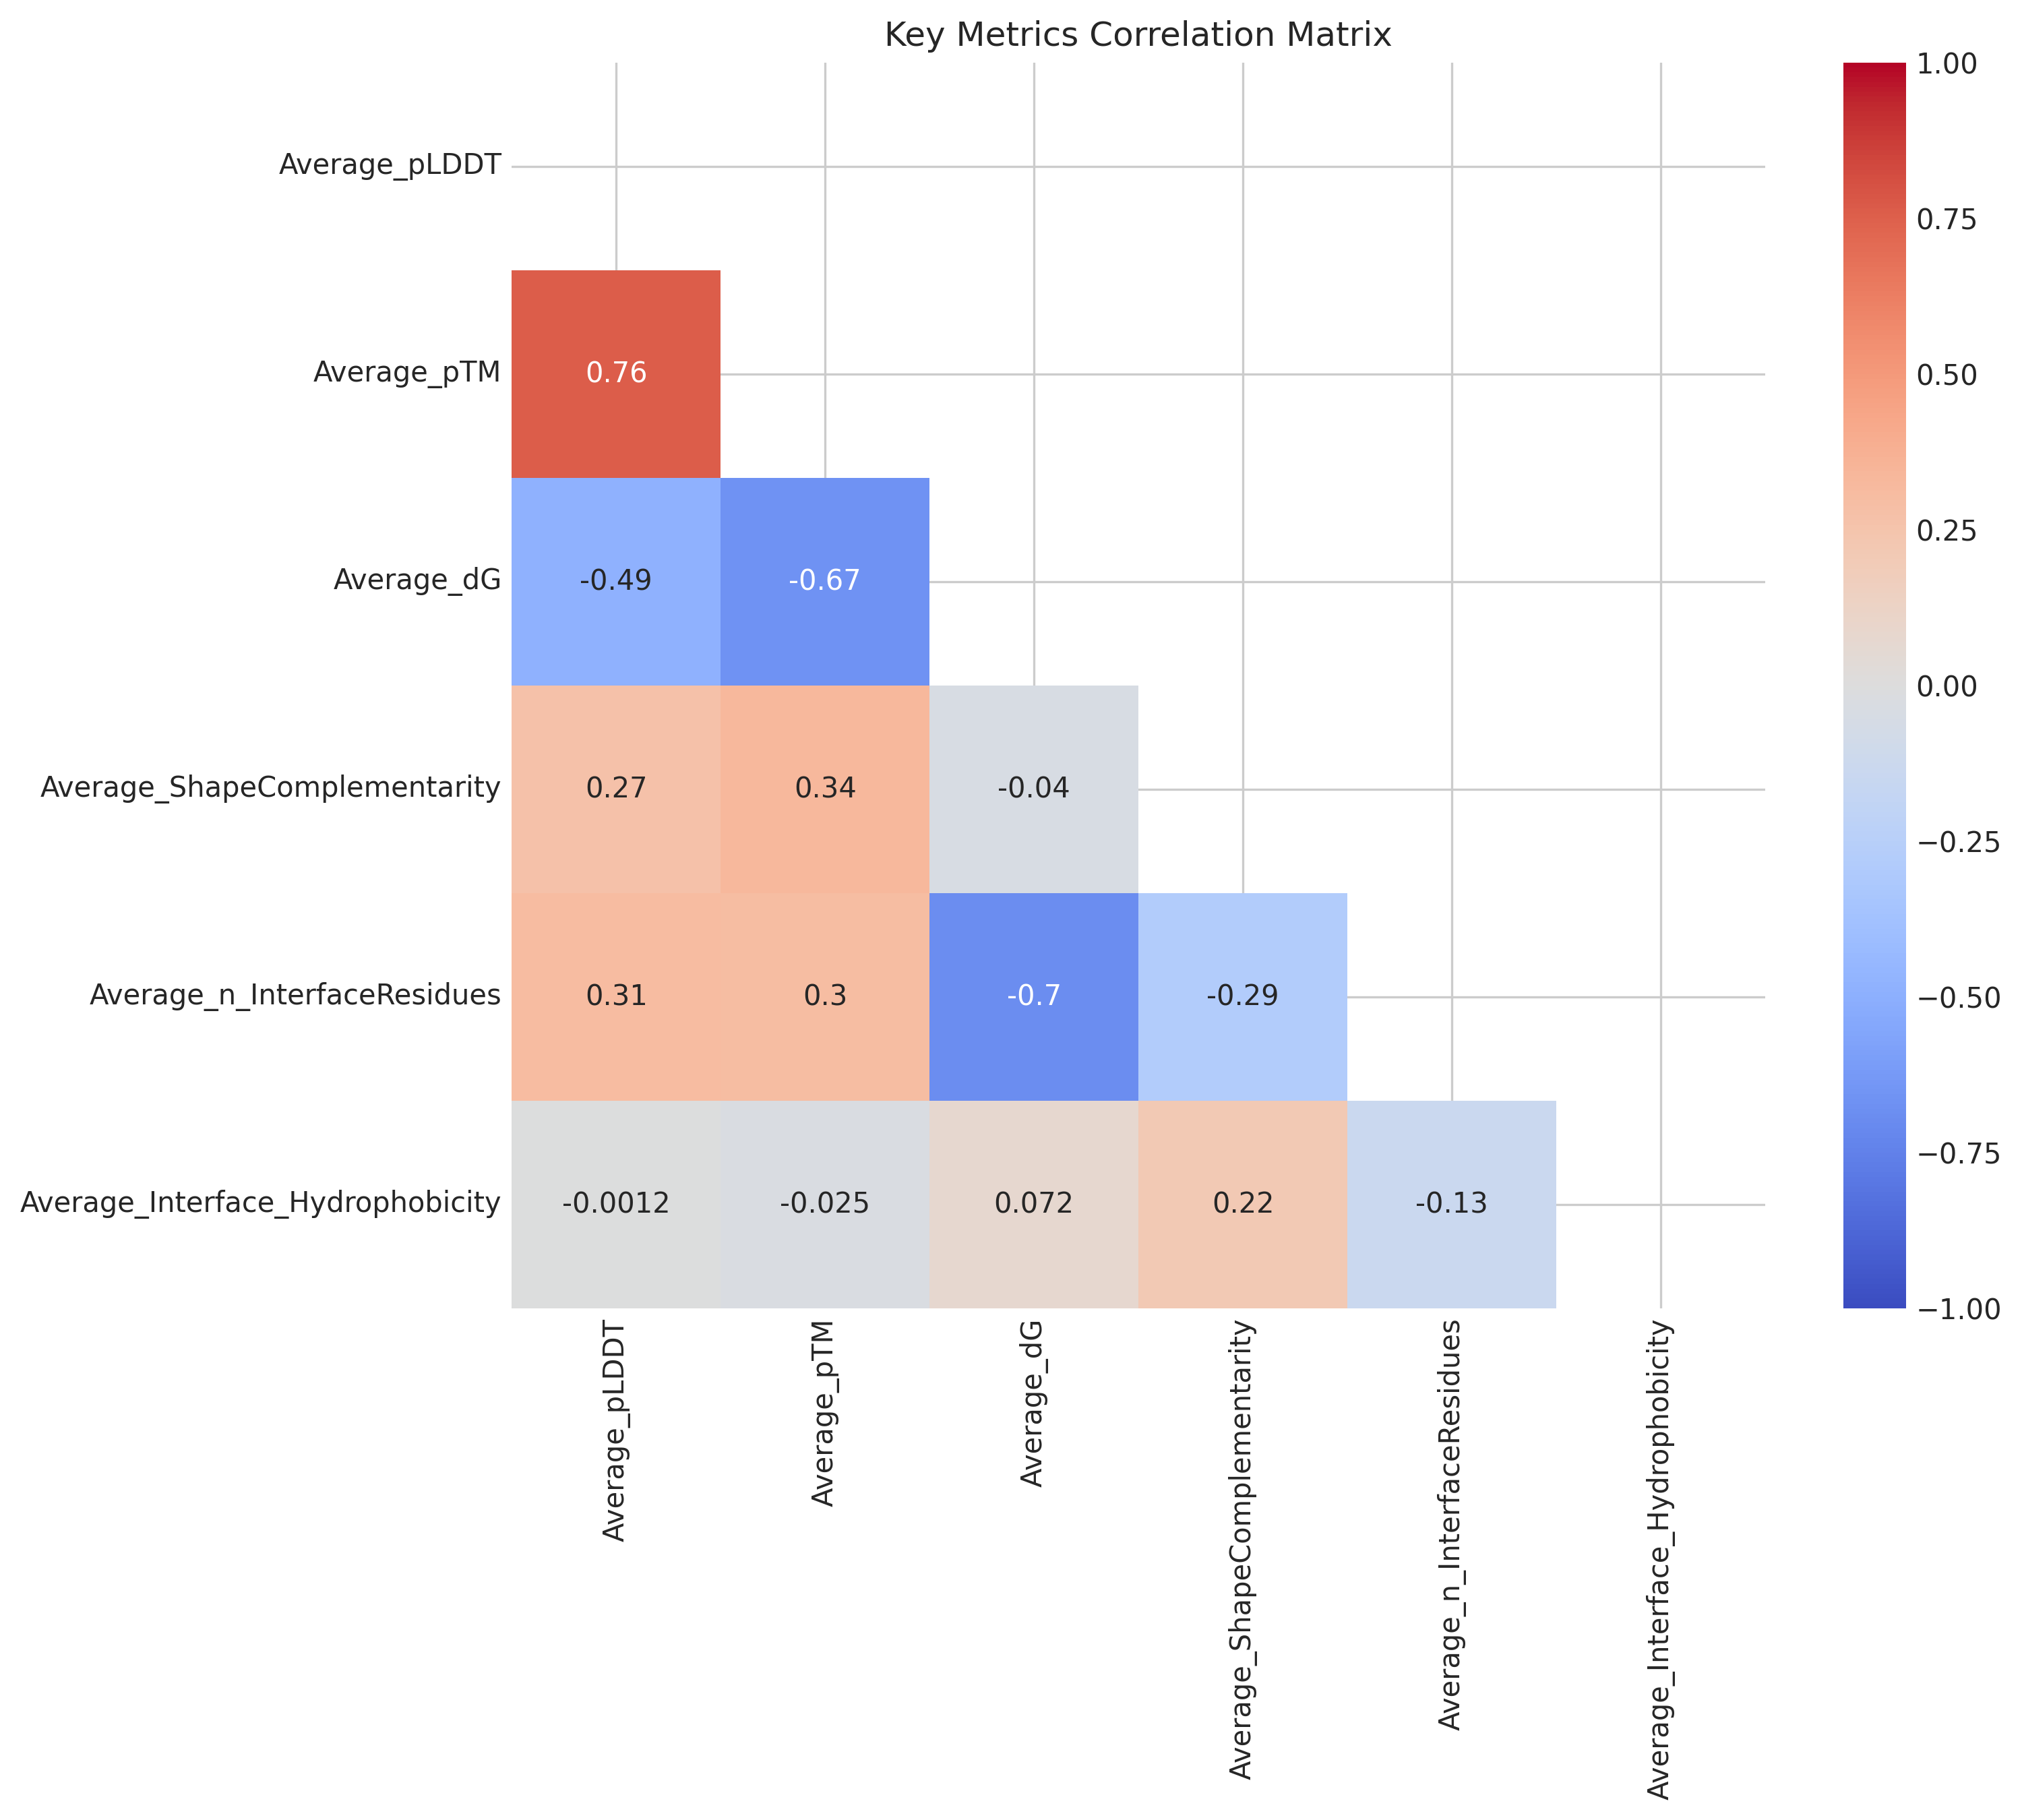

<Figure size 1920x1440 with 0 Axes>

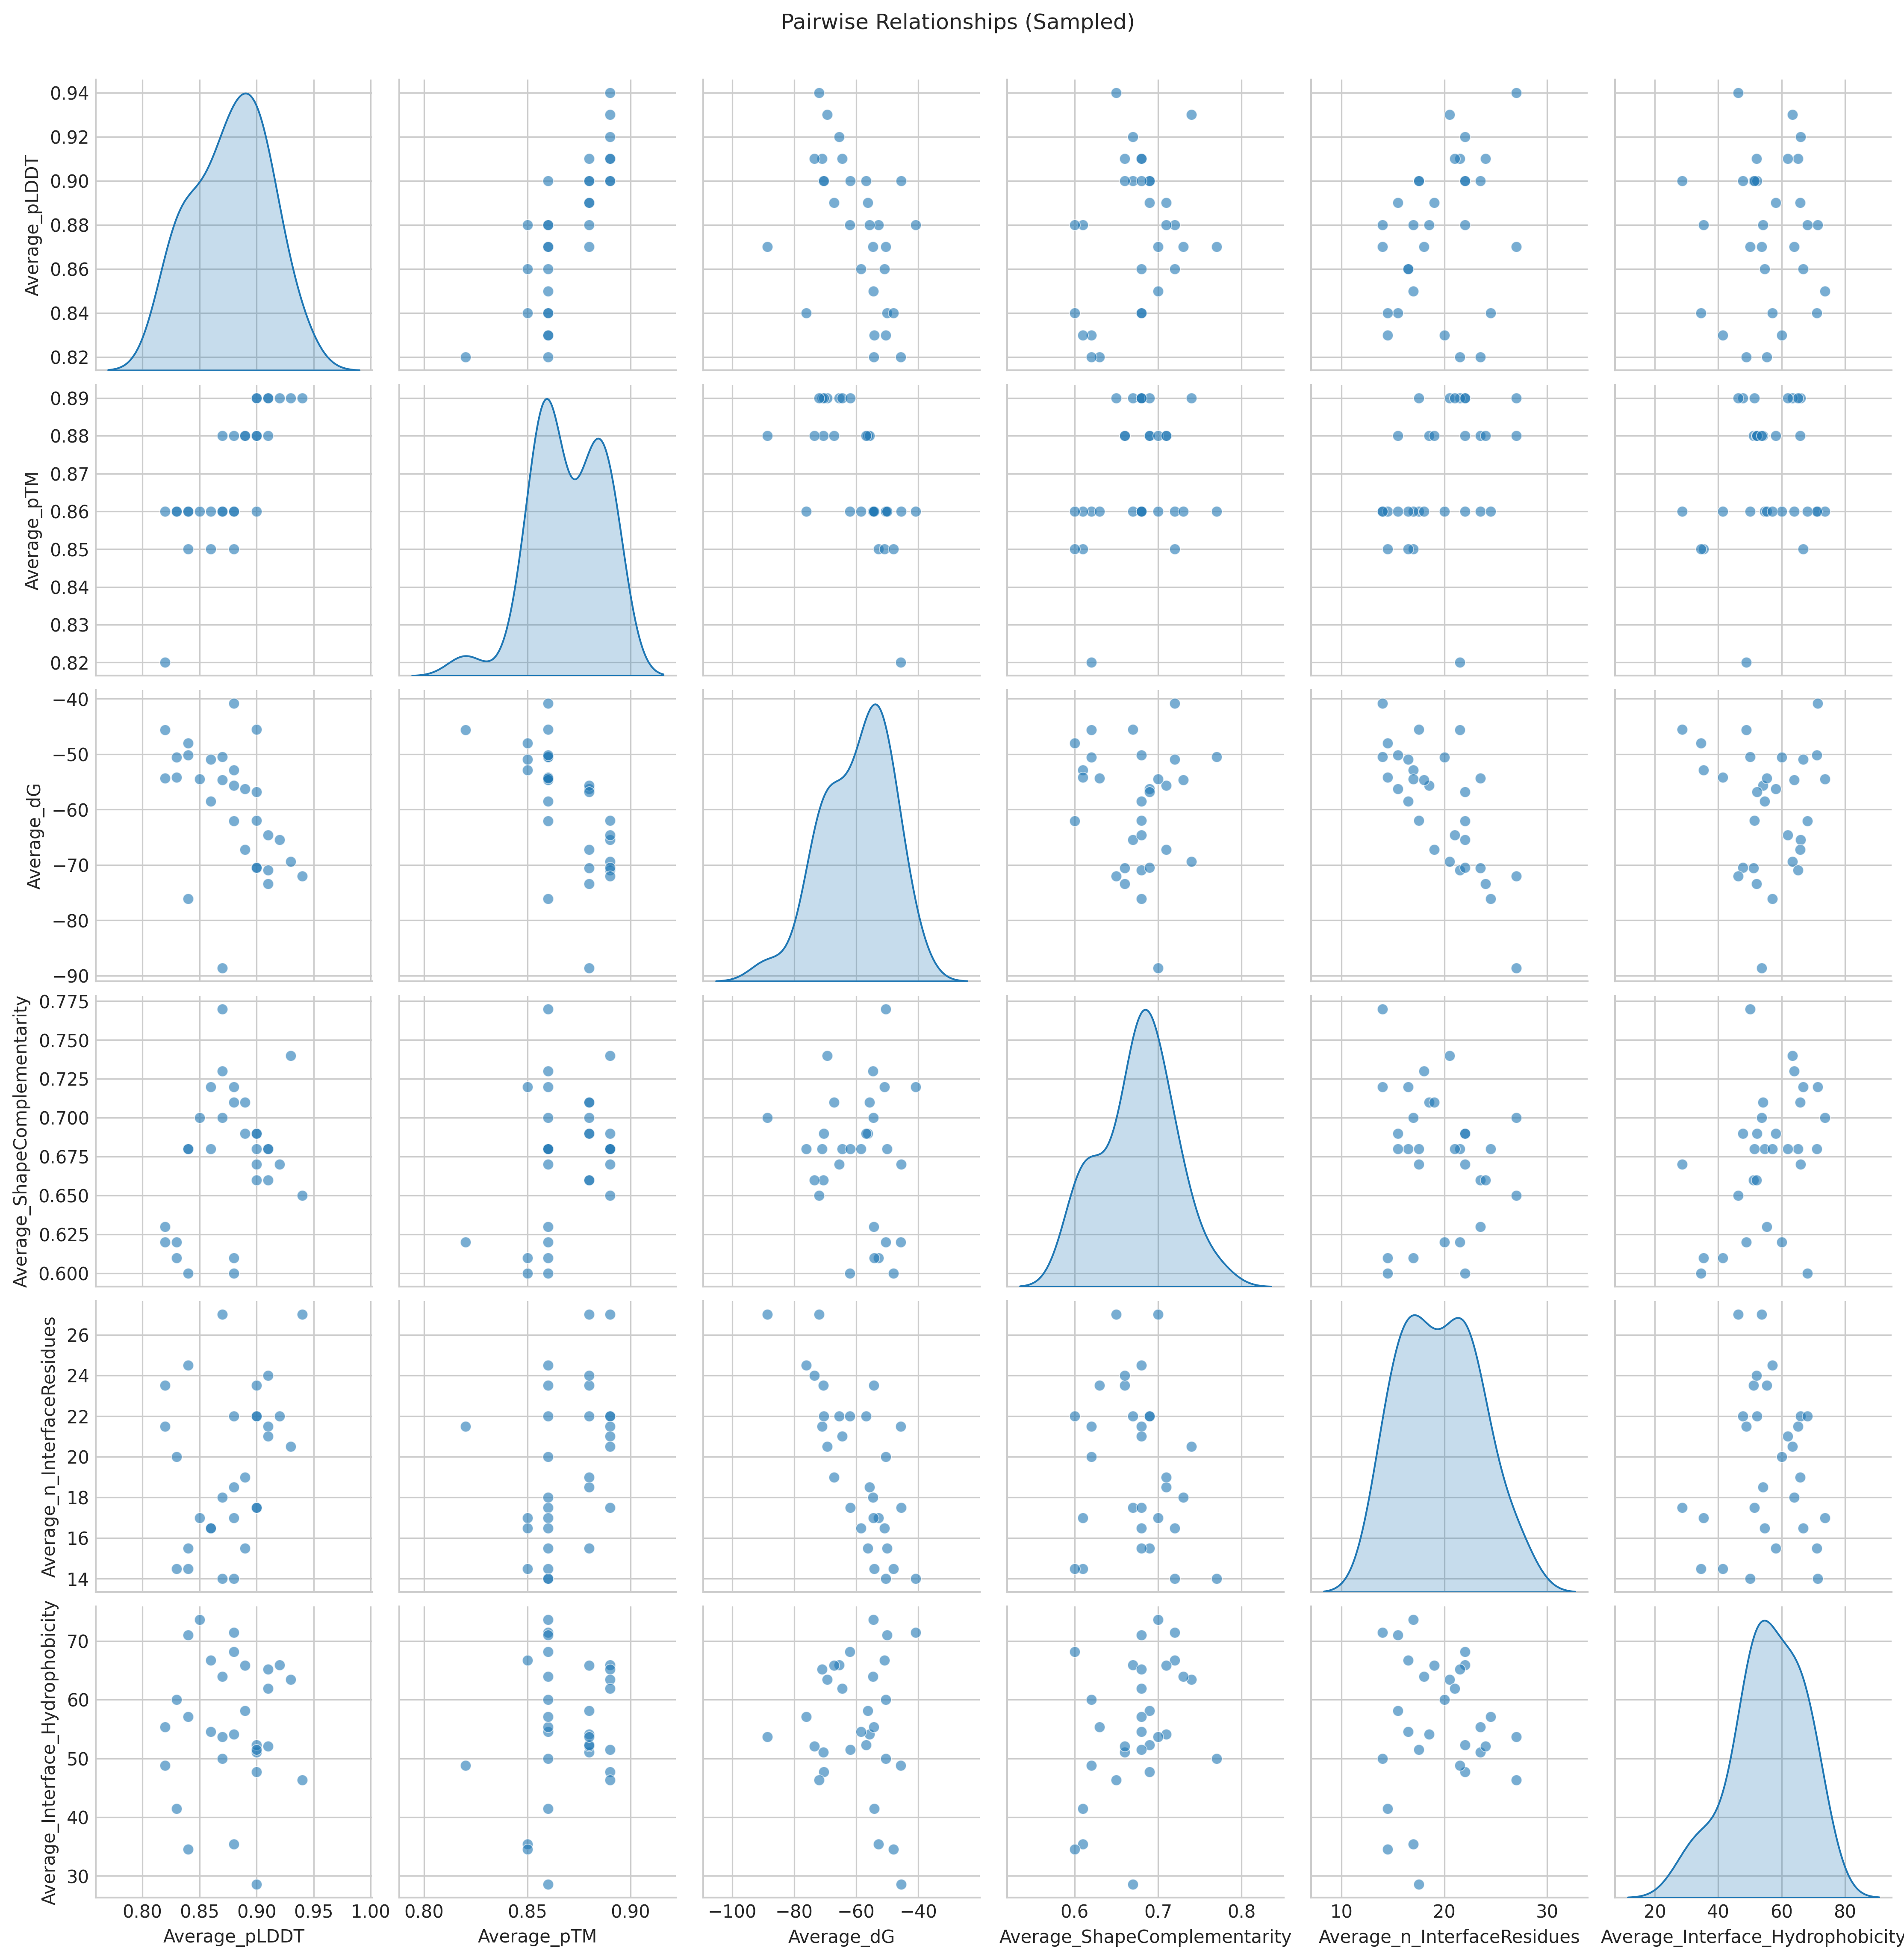

In [8]:
#@title **4. Advanced: Multi-Metric Correlation Analysis** { vertical-output: true }
#@markdown Pairwise relationships between key metrics
selected_metrics = [
    'Average_pLDDT', 'Average_pTM', 'Average_dG',
    'Average_ShapeComplementarity', 'Average_n_InterfaceResidues',
    'Average_Interface_Hydrophobicity'
]

# Correlation Heatmap
plt.figure(figsize=(10, 8))
corr_matrix = df[selected_metrics].corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm',
            vmin=-1, vmax=1, center=0)
plt.title('Key Metrics Correlation Matrix')
plt.savefig('plots/4_correlation_matrix.png', bbox_inches='tight', dpi=600)
plt.show()

# Pairplot (sampled for clarity)
plt.figure()
sns.pairplot(df[selected_metrics].sample(30, random_state=42),
             diag_kind='kde', plot_kws={'alpha':0.6})
plt.suptitle('Pairwise Relationships (Sampled)', y=1.02)
plt.savefig('plots/4_pairplot.png', bbox_inches='tight', dpi=600)
plt.show()